### Probability Mass Function. 

In [1]:
import pandas as pd 
import numpy as np 

#### Dice roll example. 

In [4]:
data = np.random.randint(1, 7, 1000)

In [10]:
data = [] 
for i in range(0, 1000):
    data.append(np.random.randint(1, 7)) 

In [12]:
outcomes = pd.Series(data)

In [18]:
probabilities = outcomes.value_counts() / outcomes.value_counts().sum()

In [19]:
probabilities

4    0.190
1    0.175
5    0.167
6    0.166
3    0.160
2    0.142
Name: count, dtype: float64

<Axes: >

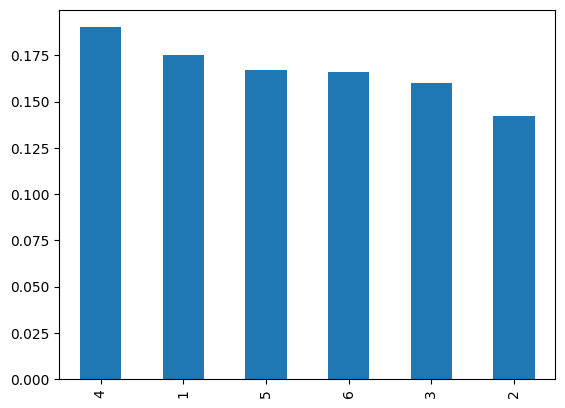

In [21]:
probabilities.plot(kind = 'bar')

#### If two dice are roll at the same time and outcome is sum of the both numbers.

In [23]:
data = [] 
for i in range(0, 1000):
    num1 = np.random.randint(1, 7)
    num2 = np.random.randint(1, 7) 
    data.append(num1 + num2)   

In [25]:
outcomes = pd.Series(data)
outcomes

0       6
1      10
2       9
3      10
4       9
       ..
995     7
996     6
997     9
998     7
999    11
Length: 1000, dtype: int64

In [43]:
probabilities = (outcomes.value_counts() / outcomes.value_counts().sum()).sort_index()

In [44]:
probabilities

2     0.024
3     0.054
4     0.082
5     0.103
6     0.129
7     0.161
8     0.156
9     0.124
10    0.081
11    0.051
12    0.035
Name: count, dtype: float64

<Axes: >

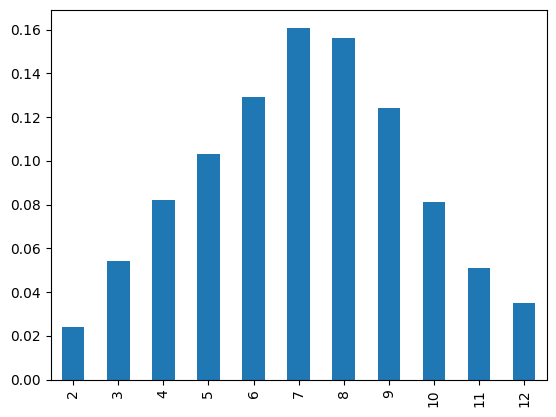

In [45]:
probabilities.plot(kind = 'bar')

### Cummulative distribution function using PMF.

In [39]:
cum_probabilities = np.cumsum((outcomes.value_counts() / outcomes.value_counts().sum()).sort_index())

In [41]:
cum_probabilities

2     0.024
3     0.078
4     0.160
5     0.263
6     0.392
7     0.553
8     0.709
9     0.833
10    0.914
11    0.965
12    1.000
Name: count, dtype: float64

<Axes: >

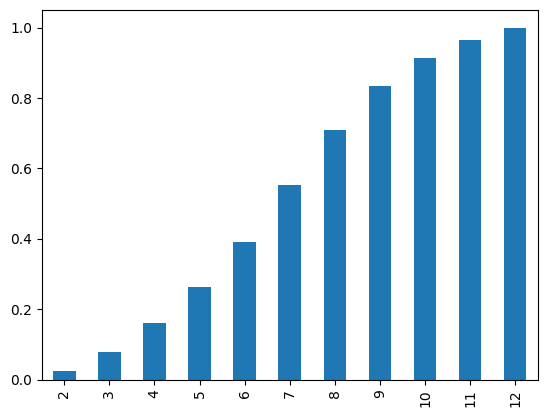

In [42]:
cum_probabilities.plot(kind = 'bar')

### Parametric Density Function. 

In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.random import normal

In [47]:
sample = normal(loc = 50, scale = 5, size = 1000)

In [51]:
sample.mean(), sample.std()

(np.float64(49.72835341703556), np.float64(4.974343974684999))

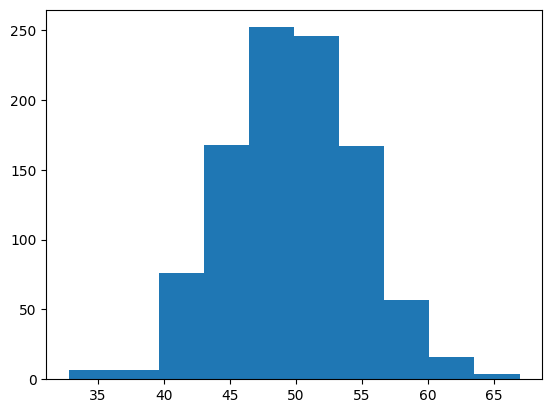

In [53]:
# plot histogram to understand the distribution of data. 
plt.hist(sample, bins=10)
plt.show()

In [54]:
# It looks like a normal distribution, after see the histogram above. 

In [55]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std() 

In [56]:
# fit the distribution with the above parameters. 
from scipy.stats import norm

dist = norm(sample_mean, sample_std)

In [57]:
dist

In [58]:
values = np.linspace(sample.min(), sample.max(), 100)

In [60]:
probabilities = []
for value in values: 
    probabilities.append(dist.pdf(value))

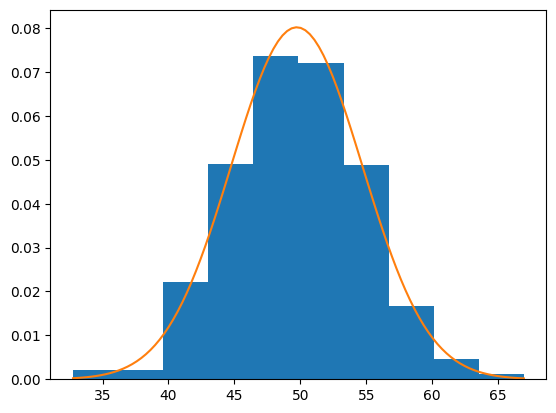

In [65]:
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)
plt.show()

C:\Users\Mohd Uzaif\AppData\Local\Temp\ipykernel_23200\3882915351.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

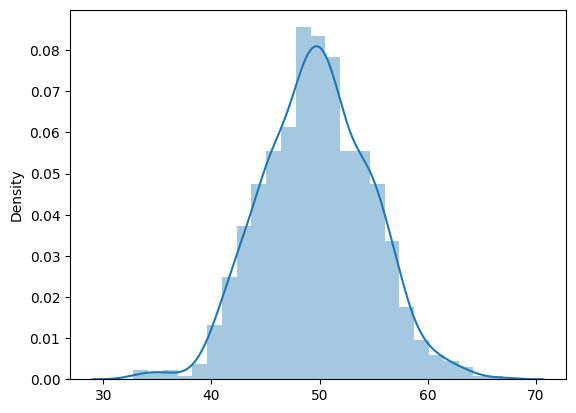

In [68]:
# we can do it directly using seaborn.
import seaborn as sns
sns.distplot(sample) 

### KDE (Kernal Density Estimate). 

In [69]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

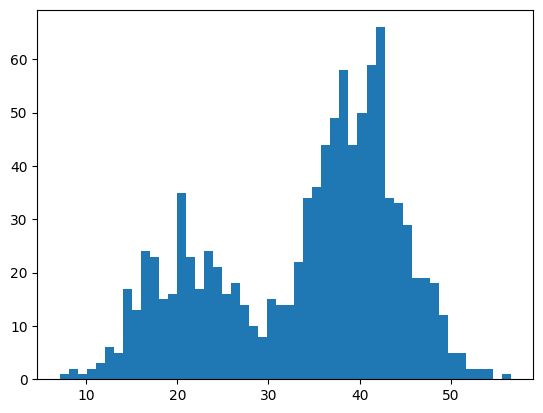

In [72]:
# plot histogram bins=50
plt.hist(sample,bins=50)
plt.show()

In [73]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [74]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [75]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

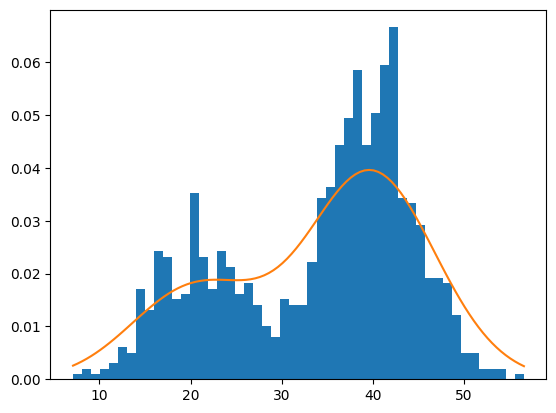

In [76]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

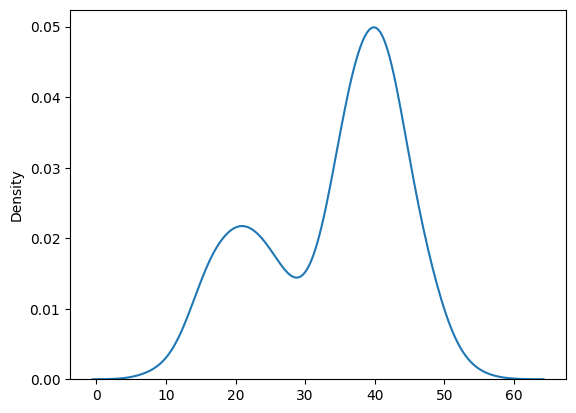

In [80]:
# using seaborn. 
sns.kdeplot(sample.reshape(1000),bw_adjust=1)

### How we use PDF and CDF in Data Science. 

In [82]:
data = sns.load_dataset('iris')

In [83]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

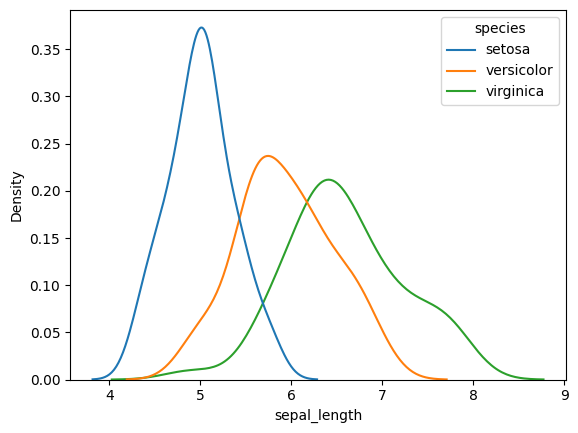

In [84]:
sns.kdeplot(data = data, x = 'sepal_length', hue = 'species')

<Axes: xlabel='sepal_width', ylabel='Density'>

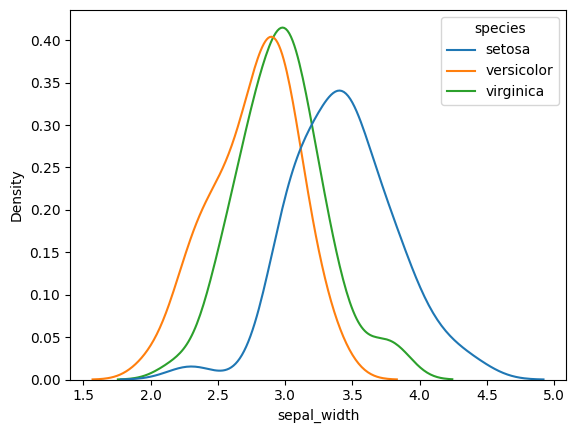

In [86]:
sns.kdeplot(data = data, x = 'sepal_width', hue = 'species')

<Axes: xlabel='petal_length', ylabel='Density'>

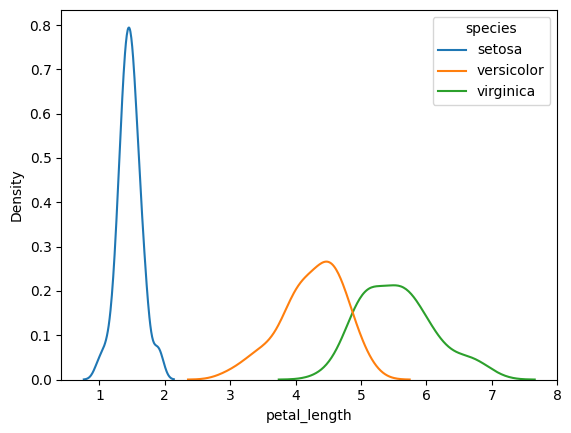

In [87]:
sns.kdeplot(data = data, x = 'petal_length', hue = 'species')

<Axes: xlabel='petal_width', ylabel='Density'>

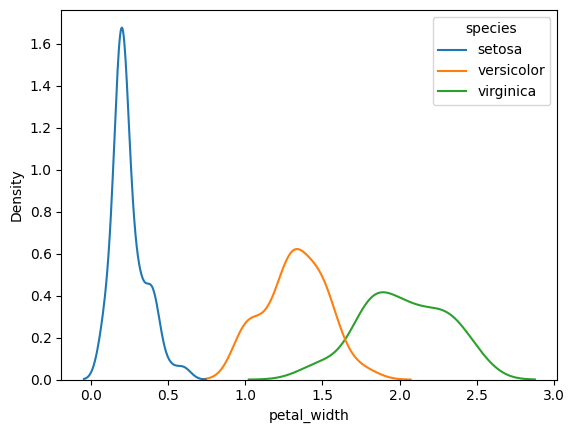

In [88]:
sns.kdeplot(data = data, x = 'petal_width', hue = 'species')

#### `NOTE : ` Here we see that petal_length and petal_width are most important feature in this dataset, because it clearly better  differentiate the flower species with respect to the sepal_length and sepal_width. 